#Висновок

##Для класифікації рецензій на imdb найкраще підійшла LSTM. Додавання двосторонньої структури або збільшення кількості шарів не дало значного покращення.

In [ ]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

max_features = 10000
max_len = 500

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_features)
X_train = sequence.pad_sequences(X_train, maxlen=max_len)
X_test = sequence.pad_sequences(X_test, maxlen=max_len)


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step



#Проста RNN:

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

model_rnn = Sequential([
    Embedding(max_features, 32, input_length=max_len),
    SimpleRNN(32),
    Dense(1, activation='sigmoid')
])
model_rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


#Проста LSTM:

In [ ]:
from tensorflow.keras.layers import LSTM

model_lstm = Sequential([
    Embedding(max_features, 32, input_length=max_len),
    LSTM(32),
    Dense(1, activation='sigmoid')
])
model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


#Двостороння LSTM:

In [ ]:
from tensorflow.keras.layers import Bidirectional

model_bilstm = Sequential([
    Embedding(max_features, 32, input_length=max_len),
    Bidirectional(LSTM(32)),
    Dense(1, activation='sigmoid')
])
model_bilstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


#Глибока LSTM з кількома шарами:

In [ ]:
model_deep = Sequential([
    Embedding(max_features, 32, input_length=max_len),
    LSTM(32, return_sequences=True),
    LSTM(32),
    Dense(1, activation='sigmoid')
])
model_deep.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
import matplotlib.pyplot as plt

def plot_metrics(history, title="Model Metrics"):

    plt.figure(figsize=(14, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title(f'{title} - Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(f'{title} - Loss')
    plt.legend()

    plt.show()


#Навчання моделей

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=3)

In [ ]:
# RNN
history_rnn = model_rnn.fit(
    X_train, y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stopping]
)


Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 43s 132ms/step - accuracy: 0.5390 - loss: 0.6863 - val_accuracy: 0.6330 - val_loss: 0.6462
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 81s 129ms/step - accuracy: 0.7322 - loss: 0.5747 - val_accuracy: 0.7612 - val_loss: 0.5047
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 43s 136ms/step - accuracy: 0.8438 - loss: 0.3608 - val_accuracy: 0.8172 - val_loss: 0.4083
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 42s 133ms/step - accuracy: 0.9050 - loss: 0.2450 - val_accuracy: 0.7938 - val_loss: 0.4706
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 43s 137ms/step - accuracy: 0.9086 - loss: 0.2275 - val_accuracy: 0.8222 - val_loss: 0.4326
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 80s 131ms/step - accuracy: 0.9525 - loss: 0.1413 - val_accuracy: 0.8272 - val_loss: 0.4900


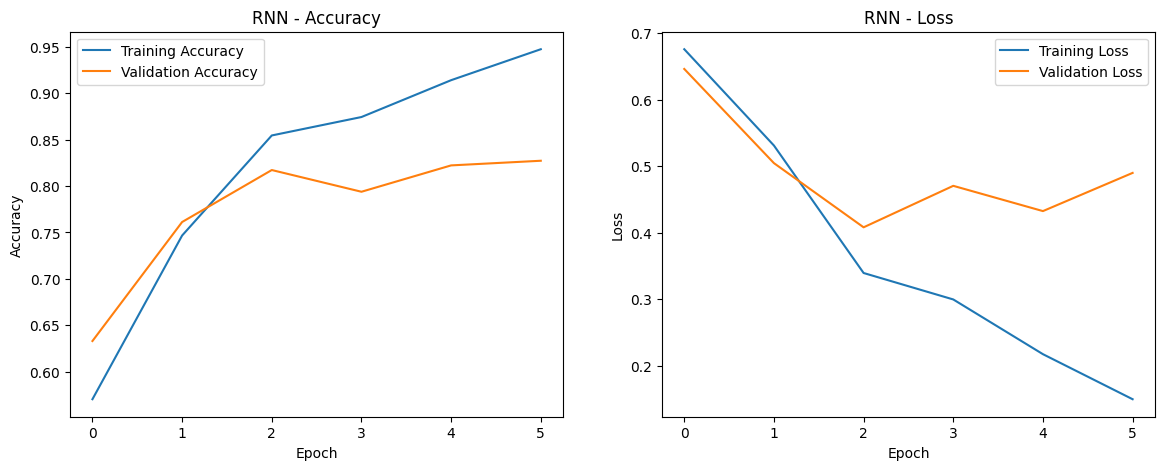

In [ ]:
plot_metrics(history_rnn, title="RNN")

In [ ]:
# lstm
history_lstm = model_lstm.fit(
    X_train, y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stopping]
)

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 80s 250ms/step - accuracy: 0.6628 - loss: 0.5942 - val_accuracy: 0.6900 - val_loss: 0.5822
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 78s 239ms/step - accuracy: 0.7898 - loss: 0.4530 - val_accuracy: 0.8530 - val_loss: 0.3493
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 83s 244ms/step - accuracy: 0.9077 - loss: 0.2415 - val_accuracy: 0.8760 - val_loss: 0.3234
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 74s 238ms/step - accuracy: 0.9464 - loss: 0.1620 - val_accuracy: 0.8658 - val_loss: 0.3275
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 73s 232ms/step - accuracy: 0.9560 - loss: 0.1341 - val_accuracy: 0.8696 - val_loss: 0.3456
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 75s 241ms/step - accuracy: 0.9659 - loss: 0.1087 - val_accuracy: 0.8736 - val_loss: 0.3660


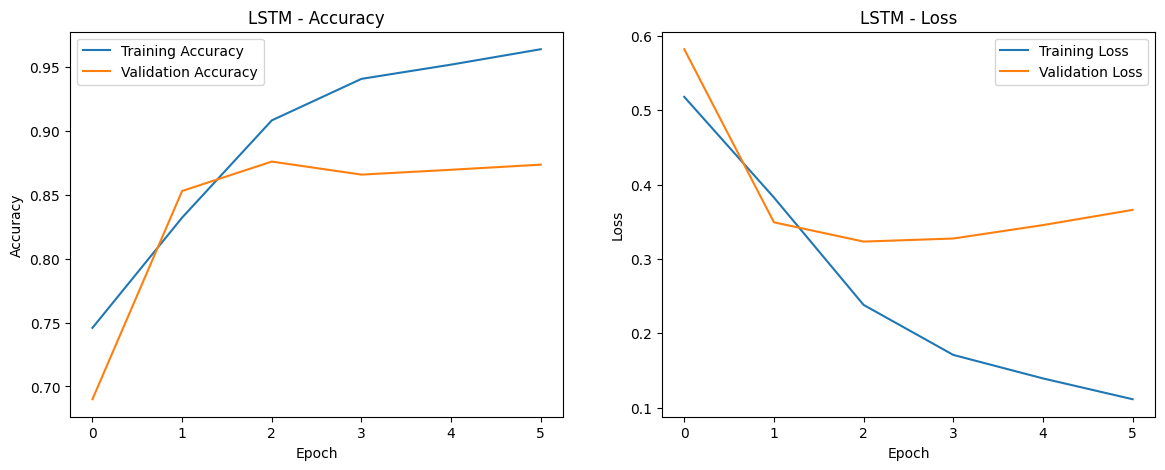

In [ ]:
plot_metrics(history_lstm, title="LSTM")

In [ ]:
# Двостороння LSTM
history_bilstm = model_bilstm.fit(
    X_train, y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stopping]
)

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 146s 454ms/step - accuracy: 0.6377 - loss: 0.6115 - val_accuracy: 0.8080 - val_loss: 0.4233
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 201s 450ms/step - accuracy: 0.8771 - loss: 0.3053 - val_accuracy: 0.8776 - val_loss: 0.3024
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 139s 443ms/step - accuracy: 0.9199 - loss: 0.2143 - val_accuracy: 0.8714 - val_loss: 0.3112
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 141s 437ms/step - accuracy: 0.9507 - loss: 0.1455 - val_accuracy: 0.8598 - val_loss: 0.4088
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 144s 444ms/step - accuracy: 0.9532 - loss: 0.1329 - val_accuracy: 0.8796 - val_loss: 0.3828


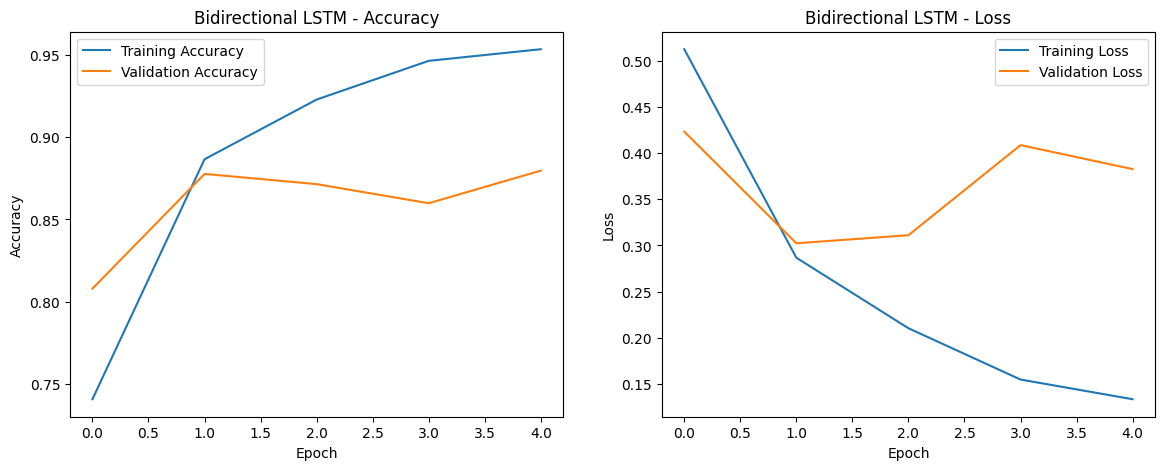

In [ ]:
plot_metrics(history_bilstm, title="Bidirectional LSTM")

In [ ]:
# Глибока LSTM
history_deep = model_deep.fit(
    X_train, y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stopping]
)

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 147s 456ms/step - accuracy: 0.6874 - loss: 0.5442 - val_accuracy: 0.8690 - val_loss: 0.3209
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 211s 484ms/step - accuracy: 0.9084 - loss: 0.2375 - val_accuracy: 0.8850 - val_loss: 0.2920
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 194s 460ms/step - accuracy: 0.9367 - loss: 0.1739 - val_accuracy: 0.8734 - val_loss: 0.3416
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 145s 465ms/step - accuracy: 0.9520 - loss: 0.1367 - val_accuracy: 0.8742 - val_loss: 0.3580
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 199s 454ms/step - accuracy: 0.9586 - loss: 0.1172 - val_accuracy: 0.8684 - val_loss: 0.3608


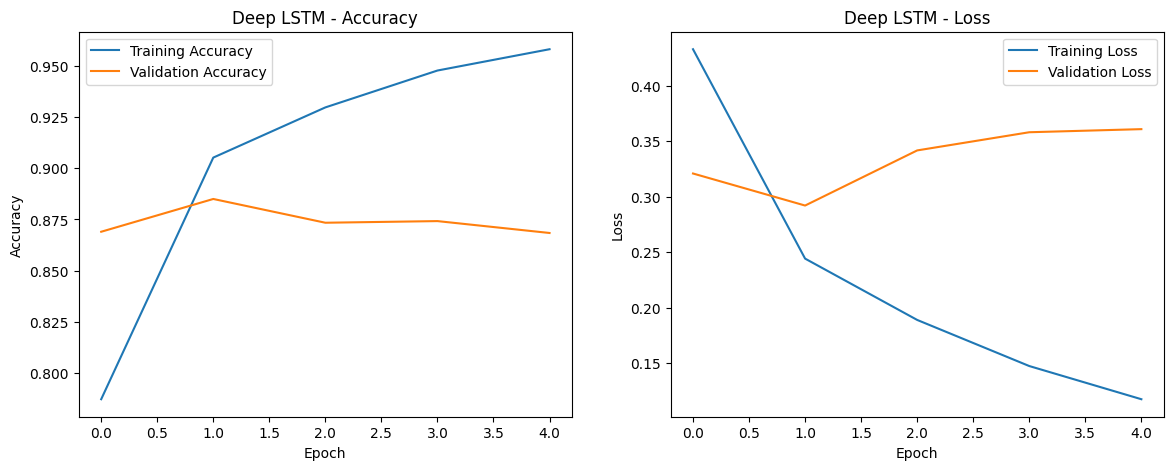

In [ ]:
plot_metrics(history_deep, title="Deep LSTM")

#Порівняння результатів


RNN Accuracy: 0.8253
LSTM Accuracy: 0.8648
Bidirectional LSTM Accuracy: 0.8648
Deep LSTM Accuracy: 0.8587


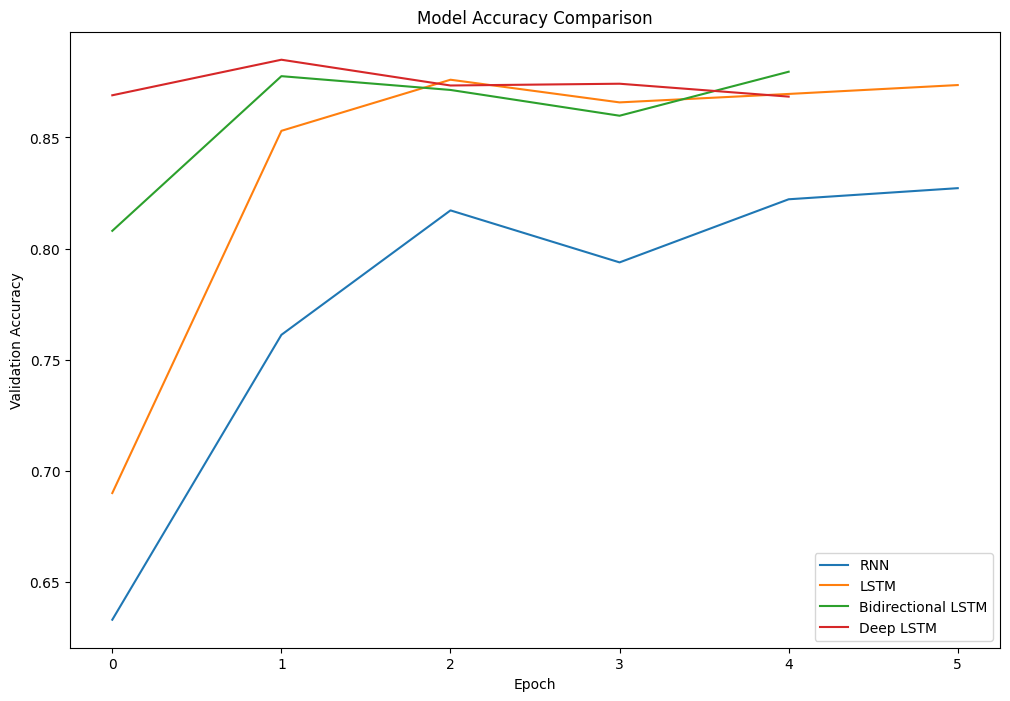

In [ ]:
rnn_score = model_rnn.evaluate(X_test, y_test, verbose=0)
lstm_score = model_lstm.evaluate(X_test, y_test, verbose=0)
bilstm_score = model_bilstm.evaluate(X_test, y_test, verbose=0)
deep_score = model_deep.evaluate(X_test, y_test, verbose=0)

plt.figure(figsize=(12, 8))
plt.plot(history_rnn.history['val_accuracy'], label='RNN')
plt.plot(history_lstm.history['val_accuracy'], label='LSTM')
plt.plot(history_bilstm.history['val_accuracy'], label='Bidirectional LSTM')
plt.plot(history_deep.history['val_accuracy'], label='Deep LSTM')
plt.title('Model Accuracy Comparison')
plt.ylabel('Validation Accuracy')
plt.xlabel('Epoch')
plt.legend()

print(f'RNN Accuracy: {rnn_score[1]:.4f}')
print(f'LSTM Accuracy: {lstm_score[1]:.4f}')
print(f'Bidirectional LSTM Accuracy: {bilstm_score[1]:.4f}')
print(f'Deep LSTM Accuracy: {deep_score[1]:.4f}')
